In [7]:
#1. 파일불러서 datagram 생성
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
data = pd.read_csv('C:/Users/User/Downloads/abalone.data')
data

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.1200,8
...,...,...,...,...,...,...,...,...,...
4171,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4172,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4173,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4174,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [8]:
#2. 결측치 제거
data.isnull().sum()

M         0
0.455     0
0.365     0
0.095     0
0.514     0
0.2245    0
0.101     0
0.15      0
15        0
dtype: int64

Text(0.5, 1.0, 'Label')

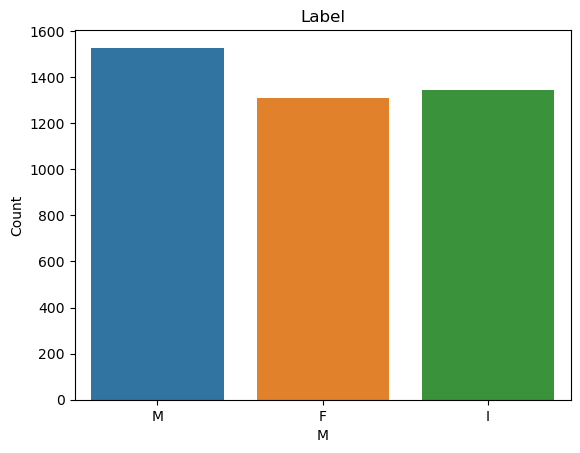

In [9]:
#3. 라벨링 그래프 표시 (라벨링 = class)
sns.countplot(data = data, x="M")
plt.xlabel("M")
plt.ylabel("Count")
plt.title("Label")

In [10]:
#4. 모든 칼럼을 숫자로 변환
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for i in data.columns:
    data[i] = le.fit_transform(data[i])

In [11]:
data

,M,0.455,0.365,0.095,0.514,0.2245,0.101,0.15,15
0,2,45,36,17,285,178,94,113,6
1,0,81,67,26,962,480,280,374,8
2,2,63,56,24,718,400,225,273,9
3,1,41,34,15,253,159,76,87,6
4,1,60,43,18,463,254,152,207,7
...,...,...,...,...,...,...,...,...,...
4171,0,88,73,32,1289,698,475,442,10
4172,2,93,71,26,1411,832,426,463,9
4173,2,95,78,40,1727,994,571,550,8
4174,0,100,80,29,1610,1005,518,530,9


In [12]:
#Splitting the data into training and test test
X = data.iloc[:,0:8].values
y = data.iloc[:,8].values

Y = pd.get_dummies(y).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [13]:
X

array([[   2,   45,   36, ...,  178,   94,  113],
       [   0,   81,   67, ...,  480,  280,  374],
       [   2,   63,   56, ...,  400,  225,  273],
       ...,
       [   2,   95,   78, ...,  994,  571,  550],
       [   0,  100,   80, ..., 1005,  518,  530],
       [   2,  117,   94, ..., 1461,  732,  813]], dtype=int64)

In [14]:
Y

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [15]:
# 전처리, 표준화
# minmax normalization : x = (x - min) / (max - min) => x / max
# robust normalization : x = (x - 중간값) / (3분위값 - 1분위값)
# standardization : x = x-mean / std

import numpy as np
# 평균

mean = np.mean(X_train, axis = 0)

# 표준편차
std = np.std(X_train, axis = 0) # 표준편차값

# 표준화값
X_train = (X_train - mean) / std
X_test = (X_test - mean) / std

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(64, activation = 'relu', input_shape = (8,)))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                576       
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2,689
Trainable params: 2,689
Non-trainable params: 0
_________________________________________________________________


In [ ]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
105/105 [==============================] - 1s 5ms/step - loss: 0.0371 - mse: 0.0371 - val_loss: 0.0357 - val_mse: 0.0357
Epoch 2/100
105/105 [==============================] - 0s 3ms/step - loss: 0.0353 - mse: 0.0353 - val_loss: 0.0357 - val_mse: 0.0357
Epoch 3/100
105/105 [==============================] - 0s 3ms/step - loss: 0.0351 - mse: 0.0351 - val_loss: 0.0357 - val_mse: 0.0357
Epoch 4/100
105/105 [==============================] - 0s 3ms/step - loss: 0.0350 - mse: 0.0350 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 5/100
105/105 [==============================] - 0s 3ms/step - loss: 0.0349 - mse: 0.0349 - val_loss: 0.0347 - val_mse: 0.0347
Epoch 6/100
105/105 [==============================] - 0s 3ms/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0351 - val_mse: 0.0351
Epoch 7/100
105/105 [==============================] - 0s 3ms/step - loss: 0.0348 - mse: 0.0348 - val_loss: 0.0346 - val_mse: 0.0346
Epoch 8/100
105/105 [==============================] - 0s 3ms/step - 